
#Rafael Perez
# Assignment 1: plots, bar charts, and filtering

This assignment uses a dataset of all NYC restaurant inspection results from Jan. 1, 2019 - Aug. 30, 2019.  Download the file from Blackboard.  The original, unfiltered dataset is at [https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

There are a lot of columns in this dataset.  To show them all when displaying the dataset, use the following code beforehand (once per notebook):
`pd.set_option('display.max_columns', None)`

All plots should have an appropriate title and axes labels.

1.  Plot a histogram to visualize the distribution of the inspection scores.  You should experiment with the number of bins to find a visualization that shows all major features of the distribution.  What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?

2.  Plot a bar chart of the distribution of boroughs.  In which boroughs are the most/least restaurant inspections?

3.  Find the mean score for inspections made in January and the mean score for inspections made in July.  From these computations, does the mean score seem to depend on the month?  Why do you think this might be?

4.  Make a bar chart of the top 15 cuisine types in the dataset.

5.  How many different cuisine types are there in the dataset?  And what is the most common street?

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [24]:
restaurant = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [25]:
restaurant.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50074557,FISH VILLAGE,Queens,2007,127TH ST,11356.0,6468307299,Chinese,01/02/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,22.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.781449,-73.841413,407.0,19.0,91900.0,4099328.0,4.041720e+09,QN23
1,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,01/02/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,29.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
2,41258823,LITTLE CAESARS,Bronx,1888,WESTCHESTER AVENUE,10472.0,3476571722,Pizza,01/02/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.832928,-73.861964,209.0,18.0,7200.0,NaN,2.000000e+00,BX55
3,50002053,THE LOCAL,Queens,13-02,44TH AVENUE,11101.0,3477385251,American,01/02/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,01/02/2019,08/30/2019,Cycle Inspection / Initial Inspection,40.749644,-73.947487,402.0,26.0,1900.0,4005221.0,4.004460e+09,QN31
4,50055374,FLORA BAR,Manhattan,945,MADISON AVE,10021.0,6317038780,American,01/02/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,11.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.773450,-73.964199,108.0,4.0,13000.0,1041666.0,1.013890e+09,MN40


In [26]:
restaurant.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,1.103640e+05,108920.000000,106853.000000,110260.000000,110260.000000,108816.000000,108816.000000,108816.000000,1.083150e+05,1.102600e+05
mean,4.663234e+07,10696.305013,22.297249,40.195320,-72.972523,251.406576,20.246094,29612.160261,2.540325e+06,2.434134e+09
std,4.318050e+06,596.189676,16.588463,4.630846,8.406504,129.875046,15.674501,31065.666987,1.342813e+06,1.334352e+09
min,3.007544e+07,10000.000000,-1.000000,0.000000,-74.248434,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.147968e+07,10022.000000,11.000000,40.686060,-73.988944,106.000000,4.000000,8000.000000,1.045866e+06,1.010540e+09
50%,5.001811e+07,10474.000000,18.000000,40.732013,-73.956292,301.000000,20.000000,17010.000000,3.014447e+06,3.004410e+09
75%,5.007025e+07,11231.000000,28.000000,40.761831,-73.896083,401.000000,34.000000,42100.000000,4.005324e+06,4.004358e+09
max,5.009750e+07,12345.000000,166.000000,40.907329,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [42]:
print(restaurant)

           CAMIS                                    DBA           BORO  \
0       50074557                           FISH VILLAGE         Queens   
1       50086382                               IL POSTO       Brooklyn   
2       41258823                         LITTLE CAESARS          Bronx   
3       50002053                              THE LOCAL         Queens   
4       50055374                              FLORA BAR      Manhattan   
5       50071225                   F & M 99 CENTS PIZZA      Manhattan   
6       50085847                   MEMORIES OF SHANGHAI         Queens   
7       41195691                  F & J PINE RESTAURANT          Bronx   
8       50033574                 CHEZ ALAIN RESTAURAUNT      Manhattan   
9       41024941                              LUCIANO'S       Brooklyn   
10      41258550                                 SUBWAY         Queens   
11      41551369             CHA PA'S VIETNAMESE EATERY      Manhattan   
12      50085424                    TA

Text(0, 0.5, '# of Restaurants')

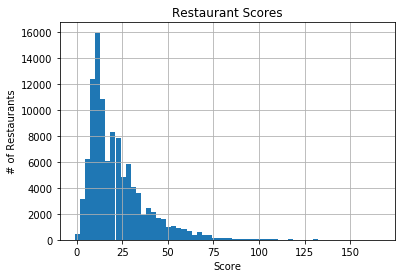

In [47]:
restaurant["SCORE"].hist(bins = 60)
plt.title("Restaurant Scores")
plt.xlabel("Score")
plt.ylabel("# of Restaurants")
#Q1: What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?
#A1:

In [46]:
restaurant.describe(include = ['O'])

,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,NTA
count,110364,110364,110315,110364,110363,110364,110364,110364,109465,107996,107996,57134,55214,110364,110364,108816
unique,17130,6,6498,2927,20042,84,215,5,91,79,2,6,209,1,27,193
top,DUNKIN',Manhattan,1,BROADWAY,9177437388,American,06/27/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,A,06/13/2019,08/30/2019,Cycle Inspection / Initial Inspection,MN17
freq,923,41873,611,3805,86,21688,907,103692,15724,15724,60494,41662,537,110364,64829,6063


Text(0, 0.5, '# of Restaurants')

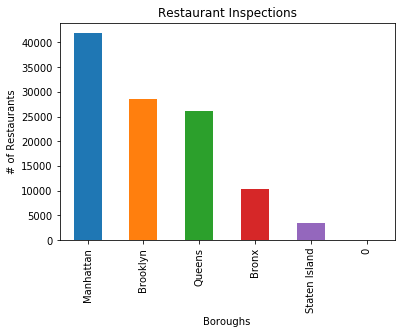

In [56]:
borough_data = restaurant['BORO'].value_counts()
borough_data.plot.bar()
plt.title("Restaurant Inspections")
plt.xlabel("Boroughs")
plt.ylabel("# of Restaurants")

#Q2: In which boroughs are the most/least restaurant inspections?
#A2: The most in manhattan and the least in Staten Island.

In [89]:
restaurant.dtypes
restaurant['INSPECTION DATE'] = pd.to_datetime(restaurant['INSPECTION DATE'])
jan_filter = restaurant["INSPECTION DATE"].dt.month == 1
july_filter = restaurant["INSPECTION DATE"].dt.month == 7
jan_mean = restaurant[jan_filter]['SCORE'].mean()
july_mean = restaurant[july_filter]['SCORE'].mean()
print('January Mean: ' + str(jan_mean))
print('July Mean:   ' + str(july_mean))
#Find the mean score for inspections made in January and the mean score for inspections made in July. 
#From these computations, does the mean score seem to depend on the month? Why do you think this might be?



January Mean: 20.332909899283187
July Mean:   26.203096228602604
